In [1]:
import pandas as pd

#### client_id: Every client’s unique ID.
#### variation: Indicates if a client was part of the experiment.
#### visitor_id: A unique ID for each client-device combination.
#### visit_id: A unique ID for each web visit/session.
#### process_step: Marks each step in the digital process.
#### date_time: Timestamp of each web activity.
#### clnt_tenure_yr: Represents how long the client has been with Vanguard, measured in years.
#### clnt_tenure_mnth: Further breaks down the client’s tenure with Vanguard in months.
#### clnt_age: Indicates the age of the client.
#### gendr: Specifies the client’s gender.
#### num_accts: Denotes the number of accounts the client holds with Vanguard.
#### bal: Gives the total balance spread across all accounts for a particular client.
#### calls_6_mnth: Records the number of times the client reached out over a call in the past six months.
#### logons_6_mnth: Reflects the frequency with which the client logged onto Vanguard’s platform over the last six months.

In [2]:
df1=pd.read_csv('/Users/f/Documents/Ironhack/PROJECT_5/df_final_demo.txt')

In [3]:
df1

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [4]:
df1.isna().sum()

client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

In [5]:
# Assuming df is your DataFrame containing the variables
columns_to_clean = ['clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth']

# Drop rows with missing values in the specified columns
cleaned_df1 = df1.dropna(subset=columns_to_clean)

In [6]:
cleaned_df1.isna().sum()

client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            0
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
dtype: int64

In [7]:
cleaned_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70594 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70594 non-null  int64  
 1   clnt_tenure_yr    70594 non-null  float64
 2   clnt_tenure_mnth  70594 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70594 non-null  object 
 5   num_accts         70594 non-null  float64
 6   bal               70594 non-null  float64
 7   calls_6_mnth      70594 non-null  float64
 8   logons_6_mnth     70594 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 5.4+ MB


In [8]:
cleaned_df1

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [9]:
df2=pd.read_csv('/Users/f/Documents/Ironhack/PROJECT_5/df_final_experiment_clients.txt')

In [10]:
df2

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [11]:
df2['Variation'].value_counts()

Variation
Test       26968
Control    23532
Name: count, dtype: int64

In [12]:
df2.isna().sum()

client_id        0
Variation    20109
dtype: int64

In [13]:
# Drop NaN values from the 'Variation' column
df2_cleaned = df2.dropna(subset=['Variation'])

# Count the values after dropping NaNs
variation_counts = df2_cleaned['Variation'].value_counts()
print(variation_counts)

Variation
Test       26968
Control    23532
Name: count, dtype: int64


In [14]:
df2_cleaned

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
50495,393005,Control
50496,2908510,Control
50497,7230446,Test
50498,5230357,Test


In [15]:
#df2_cleaned filter between control and test group
control_group = df2_cleaned[df2_cleaned['Variation'] == 'Control']
test_group = df2_cleaned[df2_cleaned['Variation'] == 'Test']

# Display the number of clients in each group
print("Number of clients in Control group:", len(control_group))
print("Number of clients in Test group:", len(test_group))

Number of clients in Control group: 23532
Number of clients in Test group: 26968


In [16]:
df3=pd.read_csv('/Users/f/Documents/Ironhack/PROJECT_5/df_final_web_data_pt_1.txt')

In [17]:
df3

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [18]:
df4=pd.read_csv('/Users/f/Documents/Ironhack/PROJECT_5/df_final_web_data_pt_2.txt')

In [19]:
df4

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [20]:
#concat df3 and df4
process_df = pd.concat([df3,df4],ignore_index=True)
process_df

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [21]:
process_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755405 entries, 0 to 755404
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     755405 non-null  int64 
 1   visitor_id    755405 non-null  object
 2   visit_id      755405 non-null  object
 3   process_step  755405 non-null  object
 4   date_time     755405 non-null  object
dtypes: int64(1), object(4)
memory usage: 28.8+ MB


In [22]:
# Assuming process_df, control_group, and test_group are your DataFrames

# Check for common 'client_id' in process_df and control_group
client_ids_control = set(control_group['client_id'])
client_ids_control
client_ids_test = set(test_group['client_id'])
client_ids_test

{2228228,
 6291464,
 8650786,
 5242916,
 2883620,
 1310756,
 4325419,
 4587564,
 3145774,
 6553647,
 6946866,
 1703992,
 3014716,
 8388674,
 7340109,
 5636190,
 1048676,
 786535,
 5898344,
 3801194,
 7209069,
 4456564,
 1704055,
 9044094,
 8519807,
 2359427,
 1441929,
 6422672,
 6029457,
 4980881,
 8388761,
 1179809,
 9437350,
 524455,
 6291626,
 7078059,
 3932330,
 6422707,
 4063413,
 6947005,
 3539134,
 524481,
 3408073,
 6553810,
 3670242,
 3145959,
 4587767,
 7733500,
 1310980,
 4718854,
 5898506,
 393489,
 6422805,
 2752791,
 6553881,
 6029600,
 5112102,
 3408170,
 9175342,
 1442097,
 5112115,
 2359607,
 7864632,
 9961785,
 5112160,
 7995744,
 262503,
 6947176,
 4850031,
 3277167,
 7340401,
 3670387,
 8257908,
 7209337,
 524675,
 6816135,
 2228618,
 6160780,
 2883982,
 4456851,
 6291861,
 786840,
 9961882,
 3408283,
 1835426,
 3015082,
 3539384,
 3932604,
 8257990,
 3015113,
 8913354,
 2621902,
 9175519,
 3539428,
 8651238,
 4325863,
 2753020,
 1966588,
 4194814,
 4325889,
 380161

In [23]:
check = 50500 - len(client_ids_control) - len(client_ids_test)

In [24]:
check

0

In [25]:
control_group = cleaned_df1[cleaned_df1['client_id'].isin(client_ids_control)]

# Filter rows for test group
test_group = cleaned_df1[cleaned_df1['client_id'].isin(client_ids_test)]

In [26]:
control_group

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
5,3727881,5.0,71.0,30.5,U,2.0,23915.60,0.0,3.0
6,272934,5.0,66.0,58.5,U,2.0,27021.42,2.0,5.0
8,285619,30.0,369.0,67.5,M,2.0,299388.72,3.0,6.0
...,...,...,...,...,...,...,...,...,...
50486,6662941,7.0,84.0,36.0,F,2.0,83101.84,4.0,7.0
50491,2787512,23.0,283.0,48.0,F,3.0,123618.60,1.0,4.0
50493,9932367,23.0,280.0,57.0,F,2.0,94466.55,6.0,9.0
50494,4079649,23.0,276.0,62.5,M,3.0,57575.28,4.0,7.0


In [27]:
test_group

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
7,388801,30.0,361.0,57.5,M,5.0,522498.72,1.0,4.0
9,8198645,15.0,189.0,54.5,F,2.0,382303.83,6.0,9.0
...,...,...,...,...,...,...,...,...,...
50492,501496,23.0,281.0,35.0,F,2.0,32529.34,0.0,3.0
50495,1780858,21.0,262.0,68.5,M,3.0,372100.59,6.0,9.0
50497,5826160,20.0,249.0,56.5,F,2.0,44837.16,2.0,5.0
50498,8739285,19.0,229.0,69.5,F,2.0,44994.24,1.0,4.0


In [28]:
# Merge control_group with process_df on client_id
control_group_merged = pd.merge(control_group, process_df, on='client_id', how='inner')

# Merge test_group with process_df on client_id
test_group_merged = pd.merge(test_group, process_df, on='client_id', how='inner')

In [29]:
control_group_merged

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id,visit_id,process_step,date_time
0,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,336210275_56978226960,724930510_65323235593_692754,confirm,2017-05-21 11:07:16
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,336210275_56978226960,724930510_65323235593_692754,step_3,2017-05-21 11:04:53
2,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,336210275_56978226960,724930510_65323235593_692754,step_2,2017-05-21 11:04:04
3,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,336210275_56978226960,724930510_65323235593_692754,step_1,2017-05-21 11:03:31
4,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,336210275_56978226960,724930510_65323235593_692754,start,2017-05-21 11:03:25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
143403,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,663474827_38847225720,923772865_74694577233_449836,confirm,2017-04-12 19:06:55
143404,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,663474827_38847225720,923772865_74694577233_449836,step_3,2017-04-12 19:05:14
143405,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,663474827_38847225720,923772865_74694577233_449836,step_2,2017-04-12 19:04:29
143406,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,663474827_38847225720,923772865_74694577233_449836,step_1,2017-04-12 19:04:07


In [30]:
test_group_merged

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id,visit_id,process_step,date_time
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13
1,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50
2,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45
3,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08
4,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177782,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,317123960_46820919455,769876461_30381166055_830233,step_2,2017-03-30 23:59:15
177783,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,317123960_46820919455,769876461_30381166055_830233,step_1,2017-03-30 23:58:51
177784,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,317123960_46820919455,769876461_30381166055_830233,start,2017-03-30 23:58:40
177785,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,317123960_46820919455,769876461_30381166055_830233,start,2017-03-30 23:55:11


#### Hypothesis:
#### User Engagement Hypothesis:
#### Null Hypothesis (H0): There is no difference in user engagement metrics (such as calls_6_mnth and logons_6_mnth) between the control and test groups.
#### Alternative Hypothesis (H1): Users in the test group have higher user engagement metrics compared to users in the control group.

#### User Satisfaction Hypothesis:
#### Null Hypothesis (H0): There is no difference in user satisfaction (potentially inferred from num_accts and bal) between the control and test groups.
#### Alternative Hypothesis (H1): Users in the test group are more satisfied with the platform compared to users in the control group.

#### User Experience Hypothesis:
#### Null Hypothesis (H0): There is no difference in user experience (potentially inferred from visit_id and process_step) between the control and test groups.
#### Alternative Hypothesis (H1): Users in the test group have a better user experience with the platform compared to users in the control group.

#### Demographic Differences Hypothesis:
#### Null Hypothesis (H0): There is no difference in demographic characteristics (such as clnt_age and gendr) between the control and test groups.
#### Alternative Hypothesis (H1): There are demographic differences between the control and test groups.

In [31]:
# Check the values or categories within each variable
print("Values or Categories in the 'client_id' Variable:")
print(test_group_merged['client_id'].unique())

print("\nValues or Categories in the 'visitor_id' Variable:")
print(test_group_merged['visitor_id'].unique())

print("\nValues or Categories in the 'visit_id' Variable:")
print(test_group_merged['visit_id'].unique())

print("\nValues or Categories in the 'process_step' Variable:")
print(test_group_merged['process_step'].unique())

print("\nValues or Categories in the 'date_time' Variable:")
print(test_group_merged['date_time'].unique())

print("\nValues or Categories in the 'clnt_tenure_yr' Variable:")
print(test_group_merged['clnt_tenure_yr'].unique())

print("\nValues or Categories in the 'clnt_tenure_mnth' Variable:")
print(test_group_merged['clnt_tenure_mnth'].unique())

print("\nValues or Categories in the 'clnt_age' Variable:")
print(test_group_merged['clnt_age'].unique())

print("\nValues or Categories in the 'gendr' Variable:")
print(test_group_merged['gendr'].unique())

print("\nValues or Categories in the 'num_accts' Variable:")
print(test_group_merged['num_accts'].unique())

print("\nValues or Categories in the 'bal' Variable:")
print(test_group_merged['bal'].unique())

print("\nValues or Categories in the 'calls_6_mnth' Variable:")
print(test_group_merged['calls_6_mnth'].unique())

print("\nValues or Categories in the 'logons_6_mnth' Variable:")
print(test_group_merged['logons_6_mnth'].unique())

Values or Categories in the 'client_id' Variable:
[ 836976 1439522 1562045 ... 5826160 8739285 7468138]

Values or Categories in the 'visitor_id' Variable:
['427070339_1413275162' '245908175_84333642537' '407067363_48226131468'
 ... '69579557_2827236069' '8756552_54841419737' '317123960_46820919455']

Values or Categories in the 'visit_id' Variable:
['228976764_46825473280_96584' '104438405_2368283624_817211'
 '898099666_87299892721_263146' ... '268191173_38958330991_849725'
 '101846948_96925910026_299041' '769876461_30381166055_830233']

Values or Categories in the 'process_step' Variable:
['confirm' 'step_3' 'step_2' 'step_1' 'start']

Values or Categories in the 'date_time' Variable:
['2017-04-02 11:51:13' '2017-04-02 11:47:50' '2017-04-02 11:46:45' ...
 '2017-03-30 23:58:51' '2017-03-30 23:58:40' '2017-03-30 23:55:11']

Values or Categories in the 'clnt_tenure_yr' Variable:
[ 6.  5. 16. 30. 15.  4.  3. 11.  8. 12.  7. 19. 18. 23. 21.  9. 14. 27.
 24. 28. 13. 20. 10. 29. 17. 22. 25.

In [32]:
# Get the top 10 unique values or categories for each variable in the test_group_merged DataFrame
print("Top 10 Values or Categories in the 'client_id' Variable:")
print(test_group_merged['client_id'].value_counts().head(10))

print("\nTop 10 Values or Categories in the 'visitor_id' Variable:")
print(test_group_merged['visitor_id'].value_counts().head(10))

print("\nTop 10 Values or Categories in the 'visit_id' Variable:")
print(test_group_merged['visit_id'].value_counts().head(10))

print("\nTop 10 Values or Categories in the 'process_step' Variable:")
print(test_group_merged['process_step'].value_counts().head(10))

print("\nTop 10 Values or Categories in the 'date_time' Variable:")
print(test_group_merged['date_time'].value_counts().head(10))

print("\nTop 10 Values or Categories in the 'clnt_tenure_yr' Variable:")
print(test_group_merged['clnt_tenure_yr'].value_counts().head(10))

print("\nTop 10 Values or Categories in the 'clnt_tenure_mnth' Variable:")
print(test_group_merged['clnt_tenure_mnth'].value_counts().head(10))

print("\nTop 10 Values or Categories in the 'clnt_age' Variable:")
print(test_group_merged['clnt_age'].value_counts().head(10))

print("\nTop 10 Values or Categories in the 'gendr' Variable:")
print(test_group_merged['gendr'].value_counts().head(10))

print("\nTop 10 Values or Categories in the 'num_accts' Variable:")
print(test_group_merged['num_accts'].value_counts().head(10))

print("\nTop 10 Values or Categories in the 'bal' Variable:")
print(test_group_merged['bal'].value_counts().head(10))

print("\nTop 10 Values or Categories in the 'calls_6_mnth' Variable:")
print(test_group_merged['calls_6_mnth'].value_counts().head(10))

print("\nTop 10 Values or Categories in the 'logons_6_mnth' Variable:")
print(test_group_merged['logons_6_mnth'].value_counts().head(10))


Top 10 Values or Categories in the 'client_id' Variable:
client_id
1595223    81
3545814    72
465007     72
9638063    71
4167815    61
2313292    61
5165430    60
2261960    59
7597144    58
5468697    58
Name: count, dtype: int64

Top 10 Values or Categories in the 'visitor_id' Variable:
visitor_id
272742682_16716805486    81
465608850_45009183511    72
819447509_47703321203    72
409434116_1011445691     63
528332823_62425640679    61
181494464_67394447335    58
806675212_20364284341    57
376618803_17238107025    56
885670746_93541696588    55
810809574_85595370255    52
Name: count, dtype: int64

Top 10 Values or Categories in the 'visit_id' Variable:
visit_id
416293838_23892754049_547527    72
712824876_8175482950_365042     61
51853936_4251561986_994623      56
151606975_75497246175_712480    56
638837797_96171594399_576638    50
888073353_30322586865_166639    48
115772476_64303792531_611679    48
428529357_6959155752_124163     42
249950914_83145678185_709773    40
401492045_

In [33]:
# Get the top 10 unique values or categories for each variable in the control_group_merged DataFrame
print("Top 10 Values or Categories in the 'client_id' Variable:")
print(control_group_merged['client_id'].value_counts().head(10))

print("\nTop 10 Values or Categories in the 'visitor_id' Variable:")
print(control_group_merged['visitor_id'].value_counts().head(10))

print("\nTop 10 Values or Categories in the 'visit_id' Variable:")
print(control_group_merged['visit_id'].value_counts().head(10))

print("\nTop 10 Values or Categories in the 'process_step' Variable:")
print(control_group_merged['process_step'].value_counts().head(10))

print("\nTop 10 Values or Categories in the 'date_time' Variable:")
print(control_group_merged['date_time'].value_counts().head(10))

print("\nTop 10 Values or Categories in the 'clnt_tenure_yr' Variable:")
print(control_group_merged['clnt_tenure_yr'].value_counts().head(10))

print("\nTop 10 Values or Categories in the 'clnt_tenure_mnth' Variable:")
print(control_group_merged['clnt_tenure_mnth'].value_counts().head(10))

print("\nTop 10 Values or Categories in the 'clnt_age' Variable:")
print(control_group_merged['clnt_age'].value_counts().head(10))

print("\nTop 10 Values or Categories in the 'gendr' Variable:")
print(control_group_merged['gendr'].value_counts().head(10))

print("\nTop 10 Values or Categories in the 'num_accts' Variable:")
print(control_group_merged['num_accts'].value_counts().head(10))

print("\nTop 10 Values or Categories in the 'bal' Variable:")
print(control_group_merged['bal'].value_counts().head(10))

print("\nTop 10 Values or Categories in the 'calls_6_mnth' Variable:")
print(control_group_merged['calls_6_mnth'].value_counts().head(10))

print("\nTop 10 Values or Categories in the 'logons_6_mnth' Variable:")
print(control_group_merged['logons_6_mnth'].value_counts().head(10))


Top 10 Values or Categories in the 'client_id' Variable:
client_id
2274658    90
5951379    81
1952790    80
7733877    72
843228     55
711827     54
9852814    52
5601303    52
8446580    51
2211014    49
Name: count, dtype: int64

Top 10 Values or Categories in the 'visitor_id' Variable:
visitor_id
857376424_12378092455    90
78799102_14329268381     80
780189529_68744403580    80
219522655_85340908938    72
445403329_35219697304    52
210109158_80283848900    51
906864133_66428944096    49
477423541_86323531833    49
166655893_84570084637    48
896300131_50974010788    48
Name: count, dtype: int64

Top 10 Values or Categories in the 'visit_id' Variable:
visit_id
518285126_8572733997_709761     88
961878360_85895454962_607105    80
602953935_48759866176_238903    80
308874104_3998249411_902973     72
351813760_31058610190_666526    48
729999701_30852197494_933568    48
750305338_48716927227_197559    40
756030933_38926415334_603627    40
708932206_49435678417_294545    40
834703874_

In [34]:
# Assuming control_group_merged is your DataFrame containing the 'gendr' column
# Calculate the total count of 'U' gender category
total_U_count = control_group_merged['gendr'].value_counts()['U']

# Calculate the count for each gender after splitting
count_M = total_U_count // 2
count_F = total_U_count - count_M

# Replace half of the 'U' counts with 'M' and the other half with 'F'
control_group_merged.loc[control_group_merged['gendr'] == 'U', 'gendr'] = ['M'] * count_M + ['F'] * count_F

# Verify the result
print(control_group_merged['gendr'].value_counts())

gendr
M    73003
F    70405
Name: count, dtype: int64


In [35]:
# Assuming test_group is your DataFrame containing the 'gendr' column
# Drop the 'X' category
test_group_merged = test_group_merged[test_group_merged['gendr'] != 'X']

# Calculate the total count of 'U' gender category
total_U_count = test_group_merged['gendr'].value_counts()['U']

# Calculate the count for each gender after splitting
count_M = total_U_count // 2
count_F = total_U_count - count_M

# Replace half of the 'U' counts with 'M' and the other half with 'F'
test_group_merged.loc[test_group_merged['gendr'] == 'U', 'gendr'] = ['M'] * count_M + ['F'] * count_F

# Verify the result
print(test_group_merged['gendr'].value_counts())

gendr
M    89452
F    88327
Name: count, dtype: int64


In [36]:
test_group_merged

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id,visit_id,process_step,date_time
0,836976,6.0,73.0,60.5,M,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13
1,836976,6.0,73.0,60.5,M,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50
2,836976,6.0,73.0,60.5,M,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45
3,836976,6.0,73.0,60.5,M,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08
4,836976,6.0,73.0,60.5,M,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177782,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,317123960_46820919455,769876461_30381166055_830233,step_2,2017-03-30 23:59:15
177783,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,317123960_46820919455,769876461_30381166055_830233,step_1,2017-03-30 23:58:51
177784,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,317123960_46820919455,769876461_30381166055_830233,start,2017-03-30 23:58:40
177785,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,317123960_46820919455,769876461_30381166055_830233,start,2017-03-30 23:55:11


In [37]:
# Define the bin edges and labels for age categories
bin_edges = [0, 18, 30, 40, 50, 60, 70, 80, 90, 100]
bin_labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

In [38]:
# Create the 'age_category' column using pd.cut
test_group_merged['age_category'] = pd.cut(test_group_merged['clnt_age'], bins=bin_edges, labels=bin_labels)

# Display the count of each age category
print(test_group_merged['age_category'].value_counts())


age_category
51-60     41272
61-70     35338
31-40     30021
41-50     29160
19-30     28554
71-80     10849
81-90      2067
0-18        380
91-100      138
Name: count, dtype: int64


/var/folders/hs/qn6zr6b15fbbv5dc9slqtd6m0000gn/T/ipykernel_76827/1125069627.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_group_merged['age_category'] = pd.cut(test_group_merged['clnt_age'], bins=bin_edges, labels=bin_labels)


In [39]:
# Create the 'age_category' column using pd.cut
control_group_merged['age_category'] = pd.cut(control_group_merged['clnt_age'], bins=bin_edges, labels=bin_labels)

# Display the count of each age category
print(control_group_merged['age_category'].value_counts())

age_category
51-60     32910
61-70     27079
31-40     24814
41-50     24356
19-30     23761
71-80      8330
81-90      1646
0-18        368
91-100      144
Name: count, dtype: int64


In [40]:
control_group_merged['clnt_tenure_yr'].describe()

count    143408.000000
mean         12.172152
std           6.989979
min           2.000000
25%           6.000000
50%          11.000000
75%          16.000000
max          55.000000
Name: clnt_tenure_yr, dtype: float64

In [41]:
import pandas as pd

# Define the bin edges and labels for tenure categories
bin_edges = [2, 10, 20, 30, 40, 50, 60]
bin_labels = ['2-10', '11-20', '21-30', '31-40', '41-50', '51-60']

# Create the 'tenure_category' column using pd.cut
control_group_merged['tenure_category'] = pd.cut(control_group_merged['clnt_tenure_yr'], bins=bin_edges, labels=bin_labels)

# Display the DataFrame with the new 'tenure_category' column
print(control_group_merged[['clnt_tenure_yr', 'tenure_category']])



        clnt_tenure_yr tenure_category
0                  7.0            2-10
1                  7.0            2-10
2                  7.0            2-10
3                  7.0            2-10
4                  7.0            2-10
...                ...             ...
143403            21.0           21-30
143404            21.0           21-30
143405            21.0           21-30
143406            21.0           21-30
143407            21.0           21-30

[143408 rows x 2 columns]


In [46]:
control_group_merged['tenure_category'].value_counts()

tenure_category
2-10     69116
11-20    53202
21-30    18703
31-40     2028
41-50      118
51-60       32
Name: count, dtype: int64

In [43]:
control_group_merged['bal'].describe()

count    1.434080e+05
mean     1.594084e+05
std      3.028934e+05
min      2.378961e+04
25%      4.112912e+04
50%      6.901215e+04
75%      1.497850e+05
max      8.292996e+06
Name: bal, dtype: float64

In [44]:
# Define the bin edges and labels for balance categories
bin_edges = [2.378961e+04, 1e+06, 2e+06, 3e+06, 4e+06, 5e+06, 6e+06, 7e+06, 8e+06, 8.292996e+06]
bin_labels = ['23,789 - 1M', '1M - 2M', '2M - 3M', '3M - 4M', '4M - 5M', '5M - 6M', '6M - 7M', '7M - 8M', '8M - 8.29M']

# Create the 'balance_category' column using pd.cut
control_group_merged['bal_category'] = pd.cut(control_group_merged['bal'], bins=bin_edges, labels=bin_labels)

# Display the DataFrame with the new 'balance_category' column
print(control_group_merged[['bal', 'bal_category']])

               bal bal_category
0        110860.30  23,789 - 1M
1        110860.30  23,789 - 1M
2        110860.30  23,789 - 1M
3        110860.30  23,789 - 1M
4        110860.30  23,789 - 1M
...            ...          ...
143403  4279873.38      4M - 5M
143404  4279873.38      4M - 5M
143405  4279873.38      4M - 5M
143406  4279873.38      4M - 5M
143407  4279873.38      4M - 5M

[143408 rows x 2 columns]


In [45]:
control_group_merged['bal_category'].value_counts()

bal_category
23,789 - 1M    140607
1M - 2M          2028
2M - 3M           487
3M - 4M           168
4M - 5M            55
7M - 8M            16
5M - 6M            12
6M - 7M             9
8M - 8.29M          1
Name: count, dtype: int64

In [47]:
control_group_merged['num_accts'].describe()

count    143408.000000
mean          2.274022
std           0.552745
min           2.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           7.000000
Name: num_accts, dtype: float64

In [68]:
# Define the bin edges and labels for number of accounts categories
bin_edges = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]
bin_labels = ['1-2', '2-3', '3-4', '4-5', '5-6', '6-7']

# Create the 'num_accts_category' column using pd.cut
control_group_merged['num_accts_category'] = pd.cut(control_group_merged['num_accts'], bins=bin_edges, labels=bin_labels)

# Display the DataFrame with the new 'num_accts_category' column
print(control_group_merged[['num_accts', 'num_accts_category']])

        num_accts num_accts_category
0             2.0                1-2
1             2.0                1-2
2             2.0                1-2
3             2.0                1-2
4             2.0                1-2
...           ...                ...
143403        3.0                2-3
143404        3.0                2-3
143405        3.0                2-3
143406        3.0                2-3
143407        3.0                2-3

[143408 rows x 2 columns]


In [42]:
control_group_merged

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id,visit_id,process_step,date_time,age_category,tenure_category
0,2304905,7.0,94.0,58.0,M,2.0,110860.30,6.0,9.0,336210275_56978226960,724930510_65323235593_692754,confirm,2017-05-21 11:07:16,51-60,2-10
1,2304905,7.0,94.0,58.0,M,2.0,110860.30,6.0,9.0,336210275_56978226960,724930510_65323235593_692754,step_3,2017-05-21 11:04:53,51-60,2-10
2,2304905,7.0,94.0,58.0,M,2.0,110860.30,6.0,9.0,336210275_56978226960,724930510_65323235593_692754,step_2,2017-05-21 11:04:04,51-60,2-10
3,2304905,7.0,94.0,58.0,M,2.0,110860.30,6.0,9.0,336210275_56978226960,724930510_65323235593_692754,step_1,2017-05-21 11:03:31,51-60,2-10
4,2304905,7.0,94.0,58.0,M,2.0,110860.30,6.0,9.0,336210275_56978226960,724930510_65323235593_692754,start,2017-05-21 11:03:25,51-60,2-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143403,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,663474827_38847225720,923772865_74694577233_449836,confirm,2017-04-12 19:06:55,61-70,21-30
143404,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,663474827_38847225720,923772865_74694577233_449836,step_3,2017-04-12 19:05:14,61-70,21-30
143405,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,663474827_38847225720,923772865_74694577233_449836,step_2,2017-04-12 19:04:29,61-70,21-30
143406,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,663474827_38847225720,923772865_74694577233_449836,step_1,2017-04-12 19:04:07,61-70,21-30


In [50]:
# Get statistics for the 'bal' variable
test_group_merged['bal'].describe()

count    1.777790e+05
mean     1.644835e+05
std      3.829402e+05
min      2.378944e+04
25%      4.100661e+04
50%      6.938044e+04
75%      1.528672e+05
max      1.632004e+07
Name: bal, dtype: float64

In [52]:
# Define the bin edges and labels for balance categories
bin_edges = [2.378944e+04, 1e+06, 2e+06, 3e+06, 4e+06, 5e+06, 6e+06, 7e+06, 8e+06, 8.292996e+06]
bin_labels = ['23,789 - 1M', '1M - 2M', '2M - 3M', '3M - 4M', '4M - 5M', '5M - 6M', '6M - 7M', '7M - 8M', '8M - 8.29M']

# Create the 'bal_category' column using pd.cut
test_group_merged['bal_category'] = pd.cut(test_group_merged['bal'], bins=bin_edges, labels=bin_labels)

# Display the DataFrame with the new 'bal_category' column
print(test_group_merged[['bal', 'bal_category']])

              bal bal_category
0        45105.30  23,789 - 1M
1        45105.30  23,789 - 1M
2        45105.30  23,789 - 1M
3        45105.30  23,789 - 1M
4        45105.30  23,789 - 1M
...           ...          ...
177782  209278.15  23,789 - 1M
177783  209278.15  23,789 - 1M
177784  209278.15  23,789 - 1M
177785  209278.15  23,789 - 1M
177786  209278.15  23,789 - 1M

[177779 rows x 2 columns]


/var/folders/hs/qn6zr6b15fbbv5dc9slqtd6m0000gn/T/ipykernel_76827/424005200.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_group_merged['bal_category'] = pd.cut(test_group_merged['bal'], bins=bin_edges, labels=bin_labels)


In [53]:
# Get statistics for the 'bal' variable
test_group_merged['clnt_tenure_yr'].describe()

count    177779.000000
mean         12.180145
std           6.941648
min           2.000000
25%           6.000000
50%          11.000000
75%          16.000000
max          55.000000
Name: clnt_tenure_yr, dtype: float64

In [55]:
# Define the bin edges and labels for tenure categories
bin_edges = [2.0, 10.0, 20.0, 30.0, 40.0, 50.0, 55.0]
bin_labels = ['2-10', '11-20', '21-30', '31-40', '41-50', '51-55']

# Create the 'clnt_tenure_category' column using pd.cut
test_group_merged['clnt_tenure_category'] = pd.cut(test_group_merged['clnt_tenure_yr'], bins=bin_edges, labels=bin_labels)

# Display the DataFrame with the new 'clnt_tenure_category' column
print(test_group_merged[['clnt_tenure_yr', 'clnt_tenure_category']])

        clnt_tenure_yr clnt_tenure_category
0                  6.0                 2-10
1                  6.0                 2-10
2                  6.0                 2-10
3                  6.0                 2-10
4                  6.0                 2-10
...                ...                  ...
177782            18.0                11-20
177783            18.0                11-20
177784            18.0                11-20
177785            18.0                11-20
177786            18.0                11-20

[177779 rows x 2 columns]


/var/folders/hs/qn6zr6b15fbbv5dc9slqtd6m0000gn/T/ipykernel_76827/2850208835.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_group_merged['clnt_tenure_category'] = pd.cut(test_group_merged['clnt_tenure_yr'], bins=bin_edges, labels=bin_labels)


In [56]:
# Get statistics for the 'bal' variable
test_group_merged['num_accts'].describe()

count    177779.000000
mean          2.254051
std           0.532166
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           7.000000
Name: num_accts, dtype: float64

In [57]:
# Define the bin edges and labels for number of accounts categories
bin_edges = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]
bin_labels = ['1-2', '2-3', '3-4', '4-5', '5-6', '6-7']

# Create the 'num_accts_category' column using pd.cut
test_group_merged['num_accts_category'] = pd.cut(test_group_merged['num_accts'], bins=bin_edges, labels=bin_labels)

# Display the DataFrame with the new 'num_accts_category' column
print(test_group_merged[['num_accts', 'num_accts_category']])

        num_accts num_accts_category
0             2.0                1-2
1             2.0                1-2
2             2.0                1-2
3             2.0                1-2
4             2.0                1-2
...           ...                ...
177782        3.0                2-3
177783        3.0                2-3
177784        3.0                2-3
177785        3.0                2-3
177786        3.0                2-3

[177779 rows x 2 columns]


/var/folders/hs/qn6zr6b15fbbv5dc9slqtd6m0000gn/T/ipykernel_76827/3525122487.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_group_merged['num_accts_category'] = pd.cut(test_group_merged['num_accts'], bins=bin_edges, labels=bin_labels)


In [59]:
#Answered the following questions about demographics:
#Who are the primary clients using this online process?
#Are the primary clients younger or older, new or long-standing?
test_group_merged

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id,visit_id,process_step,date_time,age_category,bal_category,clnt_tenure_category,num_accts_category
0,836976,6.0,73.0,60.5,M,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13,61-70,"23,789 - 1M",2-10,1-2
1,836976,6.0,73.0,60.5,M,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50,61-70,"23,789 - 1M",2-10,1-2
2,836976,6.0,73.0,60.5,M,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45,61-70,"23,789 - 1M",2-10,1-2
3,836976,6.0,73.0,60.5,M,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08,61-70,"23,789 - 1M",2-10,1-2
4,836976,6.0,73.0,60.5,M,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24,61-70,"23,789 - 1M",2-10,1-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177782,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,317123960_46820919455,769876461_30381166055_830233,step_2,2017-03-30 23:59:15,61-70,"23,789 - 1M",11-20,2-3
177783,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,317123960_46820919455,769876461_30381166055_830233,step_1,2017-03-30 23:58:51,61-70,"23,789 - 1M",11-20,2-3
177784,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,317123960_46820919455,769876461_30381166055_830233,start,2017-03-30 23:58:40,61-70,"23,789 - 1M",11-20,2-3
177785,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,317123960_46820919455,769876461_30381166055_830233,start,2017-03-30 23:55:11,61-70,"23,789 - 1M",11-20,2-3


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning

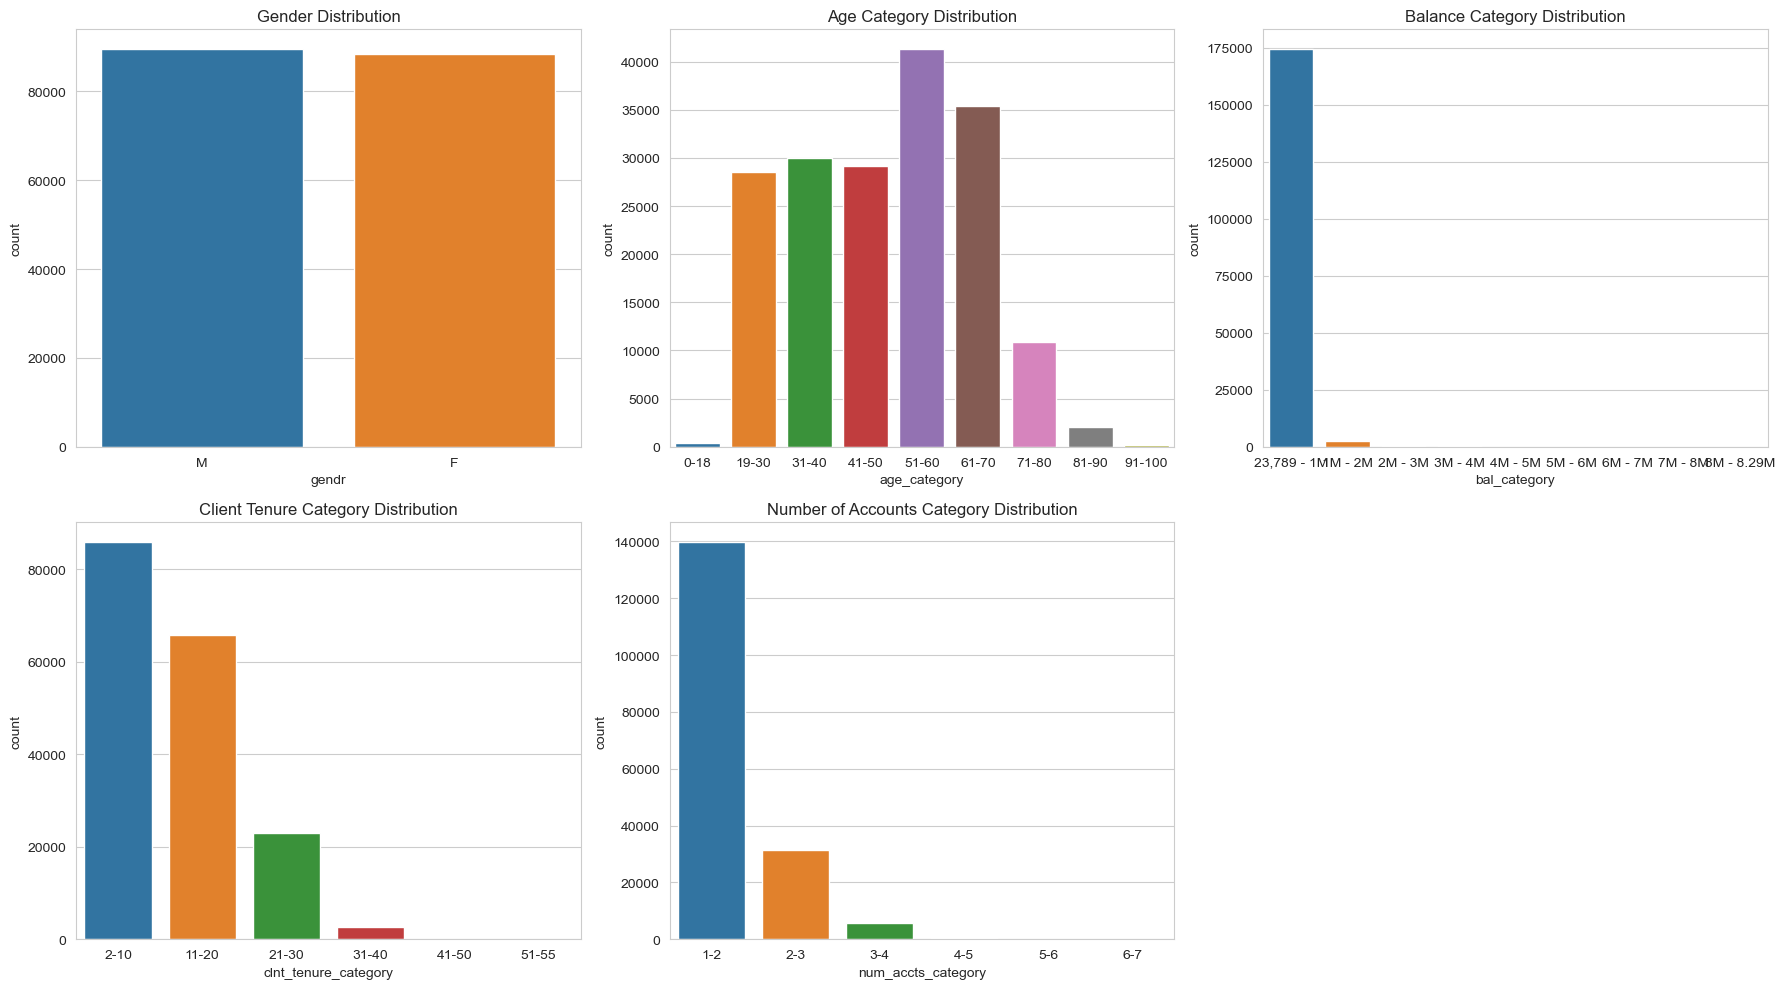

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the seaborn plot
sns.set_style("whitegrid")

# Create subplots for each demographic variable
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Gender distribution
sns.countplot(data=test_group_merged, x='gendr', ax=axes[0, 0])
axes[0, 0].set_title('Gender Distribution')

# Age category distribution
sns.countplot(data=test_group_merged, x='age_category', ax=axes[0, 1])
axes[0, 1].set_title('Age Category Distribution')

# Balance category distribution
sns.countplot(data=test_group_merged, x='bal_category', ax=axes[0, 2])
axes[0, 2].set_title('Balance Category Distribution')

# Client tenure category distribution
sns.countplot(data=test_group_merged, x='clnt_tenure_category', ax=axes[1, 0])
axes[1, 0].set_title('Client Tenure Category Distribution')

# Number of accounts category distribution
sns.countplot(data=test_group_merged, x='num_accts_category', ax=axes[1, 1])
axes[1, 1].set_title('Number of Accounts Category Distribution')

# Hide the empty subplot
fig.delaxes(axes[1, 2])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [69]:
control_group_merged

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id,visit_id,process_step,date_time,age_category,tenure_category,bal_category,num_accts_category
0,2304905,7.0,94.0,58.0,M,2.0,110860.30,6.0,9.0,336210275_56978226960,724930510_65323235593_692754,confirm,2017-05-21 11:07:16,51-60,2-10,"23,789 - 1M",1-2
1,2304905,7.0,94.0,58.0,M,2.0,110860.30,6.0,9.0,336210275_56978226960,724930510_65323235593_692754,step_3,2017-05-21 11:04:53,51-60,2-10,"23,789 - 1M",1-2
2,2304905,7.0,94.0,58.0,M,2.0,110860.30,6.0,9.0,336210275_56978226960,724930510_65323235593_692754,step_2,2017-05-21 11:04:04,51-60,2-10,"23,789 - 1M",1-2
3,2304905,7.0,94.0,58.0,M,2.0,110860.30,6.0,9.0,336210275_56978226960,724930510_65323235593_692754,step_1,2017-05-21 11:03:31,51-60,2-10,"23,789 - 1M",1-2
4,2304905,7.0,94.0,58.0,M,2.0,110860.30,6.0,9.0,336210275_56978226960,724930510_65323235593_692754,start,2017-05-21 11:03:25,51-60,2-10,"23,789 - 1M",1-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143403,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,663474827_38847225720,923772865_74694577233_449836,confirm,2017-04-12 19:06:55,61-70,21-30,4M - 5M,2-3
143404,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,663474827_38847225720,923772865_74694577233_449836,step_3,2017-04-12 19:05:14,61-70,21-30,4M - 5M,2-3
143405,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,663474827_38847225720,923772865_74694577233_449836,step_2,2017-04-12 19:04:29,61-70,21-30,4M - 5M,2-3
143406,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,663474827_38847225720,923772865_74694577233_449836,step_1,2017-04-12 19:04:07,61-70,21-30,4M - 5M,2-3


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning

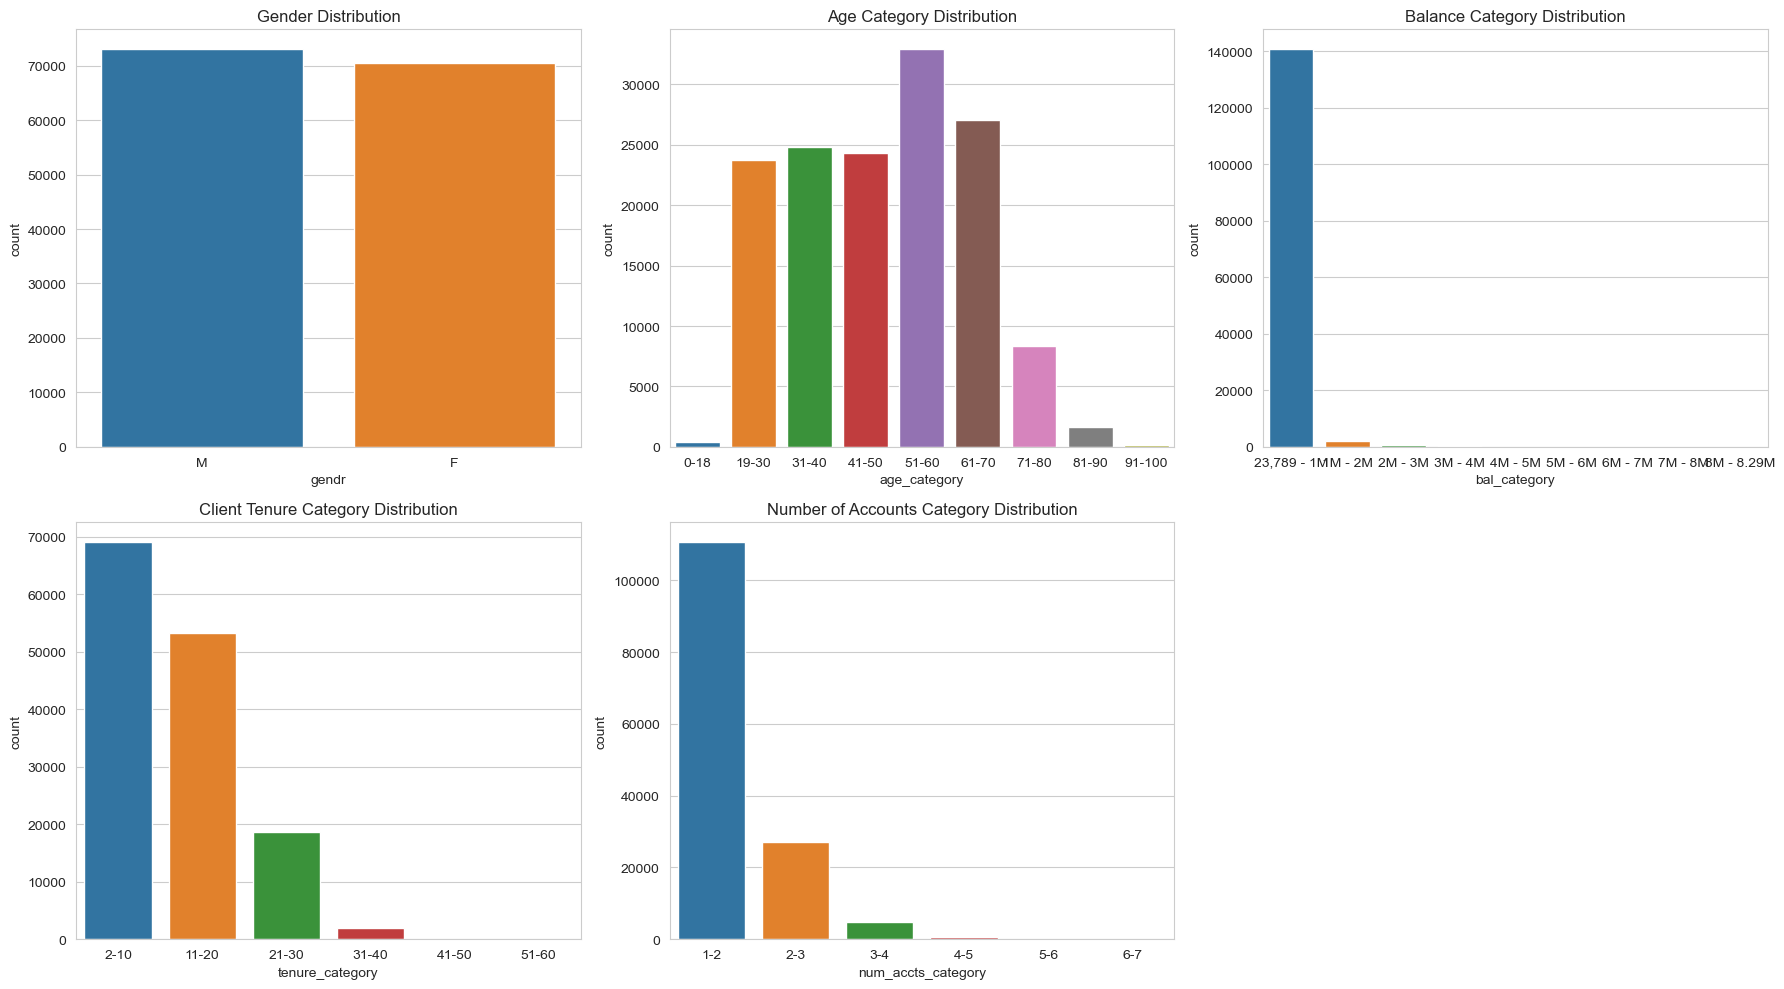

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the seaborn plot
sns.set_style("whitegrid")

# Create subplots for each demographic variable
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Gender distribution
sns.countplot(data=control_group_merged, x='gendr', ax=axes[0, 0])
axes[0, 0].set_title('Gender Distribution')

# Age category distribution
sns.countplot(data=control_group_merged, x='age_category', ax=axes[0, 1])
axes[0, 1].set_title('Age Category Distribution')

# Balance category distribution
sns.countplot(data=control_group_merged, x='bal_category', ax=axes[0, 2])
axes[0, 2].set_title('Balance Category Distribution')

# Client tenure category distribution
sns.countplot(data=control_group_merged, x='tenure_category', ax=axes[1, 0])
axes[1, 0].set_title('Client Tenure Category Distribution')

# Number of accounts category distribution
sns.countplot(data=control_group_merged, x='num_accts_category', ax=axes[1, 1])
axes[1, 1].set_title('Number of Accounts Category Distribution')

# Hide the empty subplot
fig.delaxes(axes[1, 2])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [58]:
# Analyze client demographics for control group
primary_clients_control = control_group_merged.groupby(['age_category', 'gendr', 'clnt_tenure_yr', 'num_accts', 'bal']).size().reset_index(name='count')

# Sort by count to identify primary clients
primary_clients_control_sorted = primary_clients_control.sort_values(by='count', ascending=False)

# Output the results
print("Primary Clients in Control Group:")
print(primary_clients_control_sorted)

/var/folders/hs/qn6zr6b15fbbv5dc9slqtd6m0000gn/T/ipykernel_76827/3582588658.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  primary_clients_control = control_group_merged.groupby(['age_category', 'gendr', 'clnt_tenure_yr', 'num_accts', 'bal']).size().reset_index(name='count')


Primary Clients in Control Group:
          age_category gendr  clnt_tenure_yr  num_accts         bal  count
29749227         31-40     F             5.0        2.0    78389.93     90
22693538         19-30     M             7.0        2.0    34807.48     81
62642229         51-60     F            30.0        4.0  1249006.06     80
59199255         51-60     F             6.0        2.0    54233.26     72
59200899         51-60     F             6.0        2.0    62433.62     55
...                ...   ...             ...        ...         ...    ...
43972953         41-50     F             2.0        2.0    32877.86      0
43972952         41-50     F             2.0        2.0    32877.15      0
43972951         41-50     F             2.0        2.0    32876.35      0
43972950         41-50     F             2.0        2.0    32870.83      0
131908607       91-100     M            55.0        7.0  8292996.21      0

[131908608 rows x 6 columns]


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the seaborn plot
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=primary_clients_control_sorted, x='age_category', y='count', hue='gendr', ci=None)

# Add count labels to each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.title('Primary Clients in Control Group by Age Category and Gender')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Analyze client demographics for control group
primary_clients_test = test_group_merged.groupby(['age_category', 'gendr', 'clnt_tenure_yr', 'num_accts', 'bal']).size().reset_index(name='count')

# Sort by count to identify primary clients
primary_clients_test_sorted = primary_clients_test.sort_values(by='count', ascending=False)

# Output the results
print("Primary Clients in Control Group:")
print(primary_clients_test_sorted)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the seaborn plot
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=primary_clients_test_sorted, x='age_category', y='count', hue='gendr', ci=None)

# Add count labels to each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.title('Primary Clients in Test Group by Age Category and Gender')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the mean of clnt_tenure_yr for each age_category group
average_tenure_by_age = primary_clients_test_sorted.groupby('age_category')['clnt_tenure_yr'].mean().reset_index()

# Set the style of the seaborn plot
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=average_tenure_by_age, x='age_category', y='clnt_tenure_yr', ci=None)

# Add count labels to each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 9), 
                     textcoords='offset points')

plt.title('Average Client Tenure Year by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Average Client Tenure Year')
plt.xticks(rotation=45)
plt.show()
